<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Assignment_(LogisticRegression)_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group Assignment 2 (5%)
### Total marks: 30

### Group No.:

###Group Members:
1) Chee Pui Khei (A19EB0063)

2) Joyce Lim Xin Yee (A19EB0065)

3) Asim Ahmed Ibrahim (A19EB5111)

4) Sherina Sree Nair A/P Sasidaran (A19EB5284)

5) Kaviarasu A/L Nandaguru (A19EB0015)


In this assignment, you need to apply logistic regression using Prima Indian Diabetis dataset. Note: You can use any appropriate Python libraries for this assignment, such as pandas, numpy, scikit-learn, matplotlib, and seaborn.

####(Step 1) Load the Pima Indian Diabetes dataset into Python using pandas library [2 marks]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, roc_auc_score

# Import dataset
# show some examples of data
diabetes_data = pd.read_csv('/content/diabetes.csv')
pd.concat([diabetes_data.head(), diabetes_data.tail()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


####(Step 2) Preprocess the data to clean, remove null values, and normalize if needed. [4 marks]

In [5]:
# Cleaning the data
diabetes_data.isnull().sum()

# Check any missing values in the datasheet
diabetes_data.isnull().any()

diabetes_data.info()

# Find pairwise correlation of all columns
corr = diabetes_data.corr()
corr.style.background_gradient()

# Normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diabetes_data_normalized = pd.DataFrame(scaler.fit_transform(diabetes_data), columns=diabetes_data.columns)

# Show processed data
diabetes_data.info()
diabetes_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####(Step 3) Split the dataset into training and testing subsets. Use 1) 50:50; 2)70:30; 3)80:20; and 4)90:10 ratio of training to testing data. [4 marks]

In [6]:
# Split the data into independent(X) and dependent(y) variables
# X includes "Pregnancies", "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction" and "Age"
# y includes "Outcome"
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

In [7]:
# Split datasheet into 50% training and 50% testing subsets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.50, random_state=1)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(384, 8)
(384, 8)
(384,)
(384,)


In [8]:
# Split datasheet into 70% training and 30% testing subsets
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [9]:
# Split datasheet into 80% training and 20% testing subsets
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [10]:
# Split datasheet into 90% training and 10% testing subsets
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.10, random_state=1)

print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(691, 8)
(77, 8)
(691,)
(77,)


####(Step 4) Perform logistic regression on the training data and show the training accuracy. [4 marks]

In [11]:
# By using 1st model (50:50 ratio)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)
X1_pred = model1.predict (X1_train)
train1_accuracy = (X1_pred == y1_train).mean()
print("Training accuracy for 1st training of splited 50:50 ratio:", train1_accuracy)

Training accuracy for 1st training of splited 50:50 ratio: 0.78125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# By using 2nd model (70:30 ratio)
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)
X2_pred = model2.predict (X2_train)
train2_accuracy = (X2_pred == y2_train).mean()
print("Training accuracy for 2nd training of splited 70:30 ratio:", train2_accuracy)

Training accuracy for 2nd training of splited 70:30 ratio: 0.7728119180633147


In [13]:
# By using 3rd model (80:20 ratio)
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X3_train, y3_train)
X3_pred = model3.predict (X3_train)
train3_accuracy = (X3_pred == y3_train).mean()
print("Training accuracy for 3rd training of splited 80:20 ratio:", train3_accuracy)

Training accuracy for 3rd training of splited 80:20 ratio: 0.7833876221498371


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# By using 4th model (90:10 ratio)
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X4_train, y4_train)
X4_pred = model4.predict (X4_train)
train4_accuracy = (X4_pred == y4_train).mean()
print("Training accuracy for 4th training of splited 90:10 ratio:", train4_accuracy)

Training accuracy for 4th training of splited 90:10 ratio: 0.7814761215629522


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####(Step 5) Use the trained model to make predictions on the testing data. [4 marks]

In [15]:
# Perform testing
# By using 1st model (50:50 ratio)
y1_test_pred = model1.predict(X1_test)
test1_accuracy = (y1_test_pred == y1_test).mean()
print("Testing accuracy for 1st training of splited 50:50 ratio:", test1_accuracy)

Testing accuracy for 1st training of splited 50:50 ratio: 0.7708333333333334


In [16]:
# Perform testing
# By using 2nd model (70:30 ratio)
y2_test_pred = model2.predict(X2_test)
test2_accuracy = (y2_test_pred == y2_test).mean()
print("Testing accuracy for 2nd training of splited 70:30 ratio:", test2_accuracy)

Testing accuracy for 2nd training of splited 70:30 ratio: 0.7835497835497836


In [17]:
# Perform testing
# By using 3rd model (80:20 ratio)
y3_test_pred = model3.predict(X3_test)
test3_accuracy = (y3_test_pred == y3_test).mean()
print("Testing accuracy for 3rd training of splited 80:20 ratio:", test3_accuracy)

Testing accuracy for 3rd training of splited 80:20 ratio: 0.7792207792207793


In [18]:
# Perform testing
# By using 4th model (90:10 ratio)
y4_test_pred = model4.predict(X4_test)
test4_accuracy = (y4_test_pred == y4_test).mean()
print("Testing accuracy for 4th training of splited 90:10 ratio:", test4_accuracy)

Testing accuracy for 4th training of splited 90:10 ratio: 0.7792207792207793


####(Step 6) Evaluate the model's performance using appropriate metrics such as accuracy, true positive rate and true negative rate. [8 marks]

In [19]:
#Calculate accuracy
accuracy1 = accuracy_score(y1_test, y1_test_pred)
accuracy2 = accuracy_score(y2_test, y2_test_pred)
accuracy3 = accuracy_score(y3_test, y3_test_pred)
accuracy4 = accuracy_score(y4_test, y4_test_pred)

#print accuracy
print("Accuracy for model 1 is:", accuracy1)
print("Accuracy for model 2 is:", accuracy2)
print("Accuracy for model 3 is:", accuracy3)
print("Accuracy for model 4 is:", accuracy4)
print("  ")

Accuracy for model 1 is: 0.7708333333333334
Accuracy for model 2 is: 0.7835497835497836
Accuracy for model 3 is: 0.7792207792207793
Accuracy for model 4 is: 0.7792207792207793
  


In [20]:
#Calculate confusion matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y1_test, y1_test_pred).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y2_test, y2_test_pred).ravel()
tn3, fp3, fn3, tp3 = confusion_matrix(y3_test, y3_test_pred).ravel()
tn4, fp4, fn4, tp4 = confusion_matrix(y4_test, y4_test_pred).ravel()

In [21]:
#Calculate true positive rate
true_positive_rate_model1 = tp1 / (tp1 + fn1)
true_positive_rate_model2 = tp2 / (tp2 + fn2)
true_positive_rate_model3 = tp3 / (tp3 + fn3)
true_positive_rate_model4 = tp4 / (tp4 + fn4)

print("True Positive Rate:", true_positive_rate_model1)
print("True Positive Rate:", true_positive_rate_model2)
print("True Positive Rate:", true_positive_rate_model3)
print("True Positive Rate:", true_positive_rate_model4)

True Positive Rate: 0.5652173913043478
True Positive Rate: 0.5764705882352941
True Positive Rate: 0.5636363636363636
True Positive Rate: 0.6206896551724138


In [22]:
#Calculate true negative rate
true_negative_rate_model1 = tn1 / (tn1 + fp1)
true_negative_rate_model2 = tn2 / (tn2 + fp2)
true_negative_rate_model3 = tn3 / (tn3 + fp3)
true_negative_rate_model4 = tn4 / (tn4 + fp4)

print("True Negative Rate:", true_negative_rate_model1)
print("True Negative Rate:", true_negative_rate_model2)
print("True Negative Rate:", true_negative_rate_model3)
print("True Negative Rate:", true_negative_rate_model4)

True Negative Rate: 0.8861788617886179
True Negative Rate: 0.9041095890410958
True Negative Rate: 0.898989898989899
True Negative Rate: 0.875


####(Step 7) Visualize the model's performance using appropriate charts such as a confusion matrix. [4 marks]

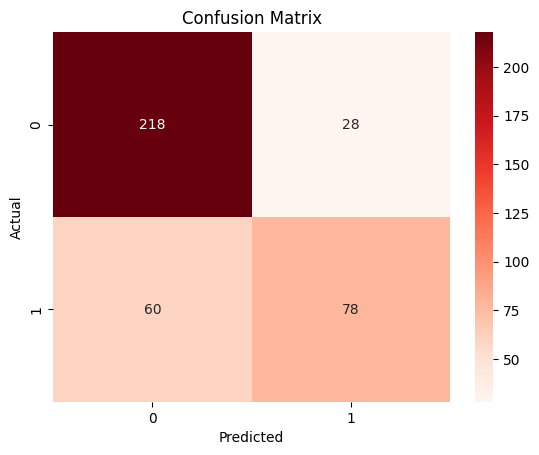

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y1_test, y1_test_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

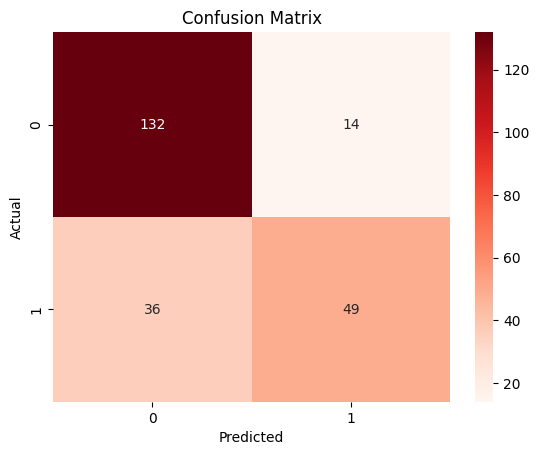

In [24]:
# Calculate confusion matrix
cm = confusion_matrix(y2_test, y2_test_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

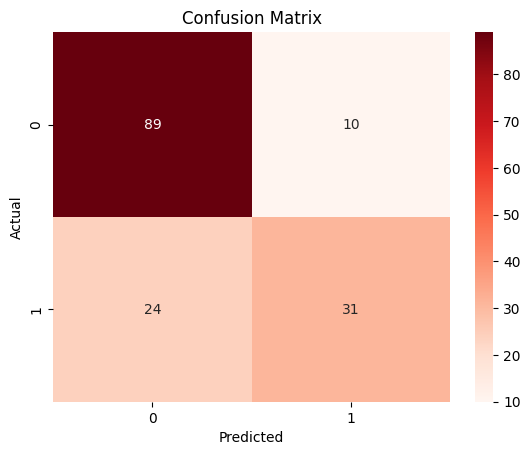

In [25]:
# Calculate confusion matrix
cm = confusion_matrix(y3_test, y3_test_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

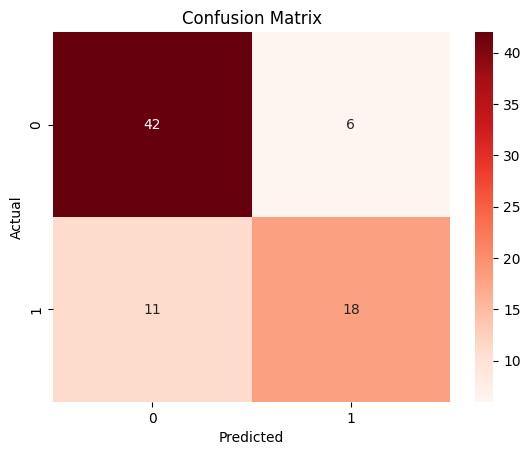

In [26]:
# Calculate confusion matrix
cm = confusion_matrix(y4_test, y4_test_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()